<h2>Week 2 Part 1 Assignment</h2>
<h5> Date : June 15, 2018 </h5>
<h5> Authors : Dhananjay Kumar, Sang Yoon Hwang, Matheesha Thambeliyagodage, Santosh Manjrekar </h5>  
<p>This week's assignment is to : <br>

1. Load a graph database of your choosing from a text file or other source.  If you take a large network dataset from the web (such as from https://snap.stanford.edu/data/), please feel free at this point to load just a small subset of the nodes and edges. <br>
2. Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.  You may either code the functions by hand (to build your intuition and insight), or use functions in an existing package. <br>
3. Use a visualization tool of your choice (Neo4j, Gephi, etc.) to display information.</p>

In [181]:
## Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (20.0, 10.0)
import networkx as nx
import operator
#import neonx

<h3> Analysis of Marvel Universe Social Network Data </h3><br>
For this assignment we will consider Marvel Universe Social Network Data <br>
Data Source: hero-network.csv from https://www.kaggle.com/csanhueza/the-marvel-universe-social-network/data <br>

In [182]:
# Import data
import sys
import types
import pandas as pd
from botocore.client import Config
import ibm_boto3

def __iter__(self): return 0

# @hidden_cell
# The following code accesses a file in your IBM Cloud Object Storage. It includes your credentials.
# You might want to remove those credentials before you share your notebook.
client_0c683be7da1a4afa9dff4d3e74df6e8d = ibm_boto3.client(service_name='s3',
    ibm_api_key_id='adA2J5oNgPawOx24Jsa6H75Di50OtD_9F7GEmrXXOn2C',
    ibm_auth_endpoint="https://iam.ng.bluemix.net/oidc/token",
    config=Config(signature_version='oauth'),
    endpoint_url='https://s3-api.us-geo.objectstorage.service.networklayer.com')

body = client_0c683be7da1a4afa9dff4d3e74df6e8d.get_object(Bucket='week1-donotdelete-pr-w507sjzvmr6k5c',Key='hero-network.csv')['Body']
# add missing __iter__ method, so pandas accepts body as file-like object
if not hasattr(body, "__iter__"): body.__iter__ = types.MethodType( __iter__, body )

df_data_1 = pd.read_csv(body, header=None)
# Source - Person (SuperHero)
# Target - The person this person interact with 
df_data_1.columns = ['Source', 'Target']


In [183]:
df_data_1.head()

,Source,Target
0,"LITTLE, ABNER",PRINCESS ZANDA
1,"LITTLE, ABNER",BLACK PANTHER/T'CHAL
2,BLACK PANTHER/T'CHAL,PRINCESS ZANDA
3,"LITTLE, ABNER",PRINCESS ZANDA
4,"LITTLE, ABNER",BLACK PANTHER/T'CHAL


In [139]:
# No. of Records
df_data_1.shape[0]

574467

<h3> Prune Data </h3>

As seen above, the uploaded data is quite large (nearly 600K records), therefore we need to prune this data and make it manageable for visualization.

In [184]:
# Take 1% of data -  Random sample
df2 = df_data_1.sample(int(round(df_data_1.shape[0]*.01, 0)))
df2.shape[0]

5745

<h3> Analyse Data </h3>


In [185]:
# Most common Superheros in Source - df2 dataframe
df2.Source.value_counts().head(10)

CAPTAIN AMERICA         83
SPIDER-MAN/PETER PAR    77
INVISIBLE WOMAN/SUE     61
BEAST/HENRY &HANK& P    60
WOLVERINE/LOGAN         59
VISION                  53
STORM/ORORO MUNROE S    53
IRON MAN/TONY STARK     53
MR. FANTASTIC/REED R    51
HUMAN TORCH/JOHNNY S    49
Name: Source, dtype: int64

In [186]:
# Most common Superheros in Target - df2 dataframe
df2.Target.value_counts().head(10)

CAPTAIN AMERICA         76
SPIDER-MAN/PETER PAR    65
MR. FANTASTIC/REED R    62
STORM/ORORO MUNROE S    61
THING/BENJAMIN J. GR    56
IRON MAN/TONY STARK     51
THOR/DR. DONALD BLAK    51
SCARLET WITCH/WANDA     49
WONDER MAN/SIMON WIL    48
HAWK                    48
Name: Target, dtype: int64

In [187]:
# Get no. of unique Superheros in Source & Target
print("Source :",df2.Target.nunique())
print("Target :",df2.Target.nunique())

Source : 1748
Target : 1748


<h3> Create Graph from our random 1% dataset </h3>

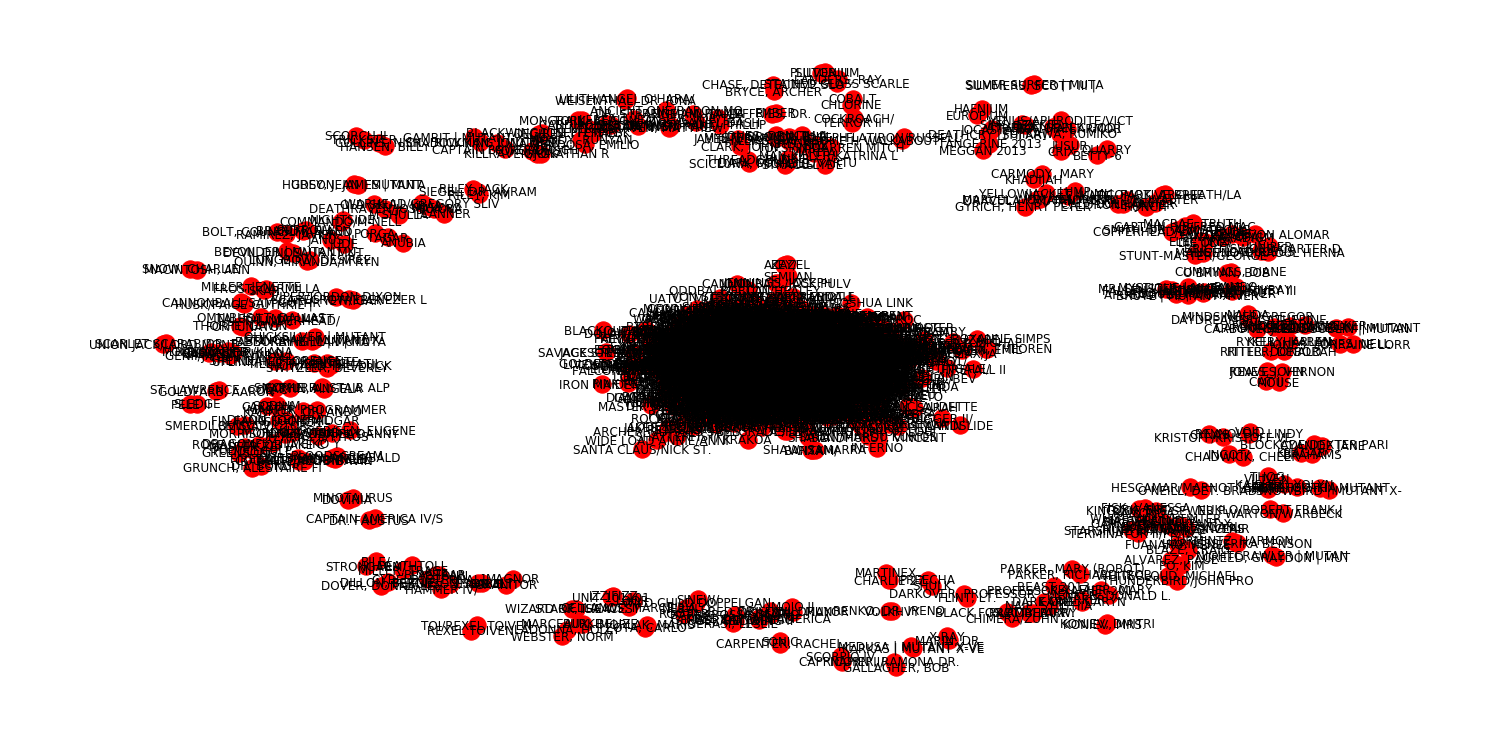

In [188]:
# Create Graph from Networkx  pG - Parent Graph
pG = nx.from_pandas_dataframe(df2,source='Source', target='Target', create_using=nx.Graph())
# Plot Parent Graph - pG
plt.show(nx.draw(pG, with_labels=True))

In [189]:
# Vital stats of pG
print(nx.info(pG))

Name: 
Type: Graph
Number of nodes: 2513
Number of edges: 5045
Average degree:   4.0151


In [190]:
# Is pG connected , not
nx.is_connected(pG)

False

<h3> Get Largest Connected Graph </h3>
<p>As seen above in the Graph as well as in the above is_connected test, our Graph, pG is a disconnected graph.Thererfore lets retrieve the largest connected graph from pG. </p>

In [191]:
# Retrieve largest Conected Graph from parent Graph pG
if not nx.is_connected(pG):
    # get a list of unconnected networks
    sub_graphs = nx.connected_component_subgraphs(pG)
    sgList = list(sub_graphs)
    main_graph = sgList[0]

    # find the largest network in that list
    for sg in sub_graphs:
        if len(sg.nodes()) > len(main_graph.nodes()):
            main_graph = sg

    cG = main_graph

In [179]:
for dd in list(nx.connected_component_subgraphs(pG)):
    if len(sg.nodes()) > len(main_graph.nodes()):
            main_graph = sg

    cG = main_graph
    

<h3> Visualize the largest connected graph </h3>
<p>Lets create a graph for the largest connected graph, cG retrieved from parent graph pG </p>

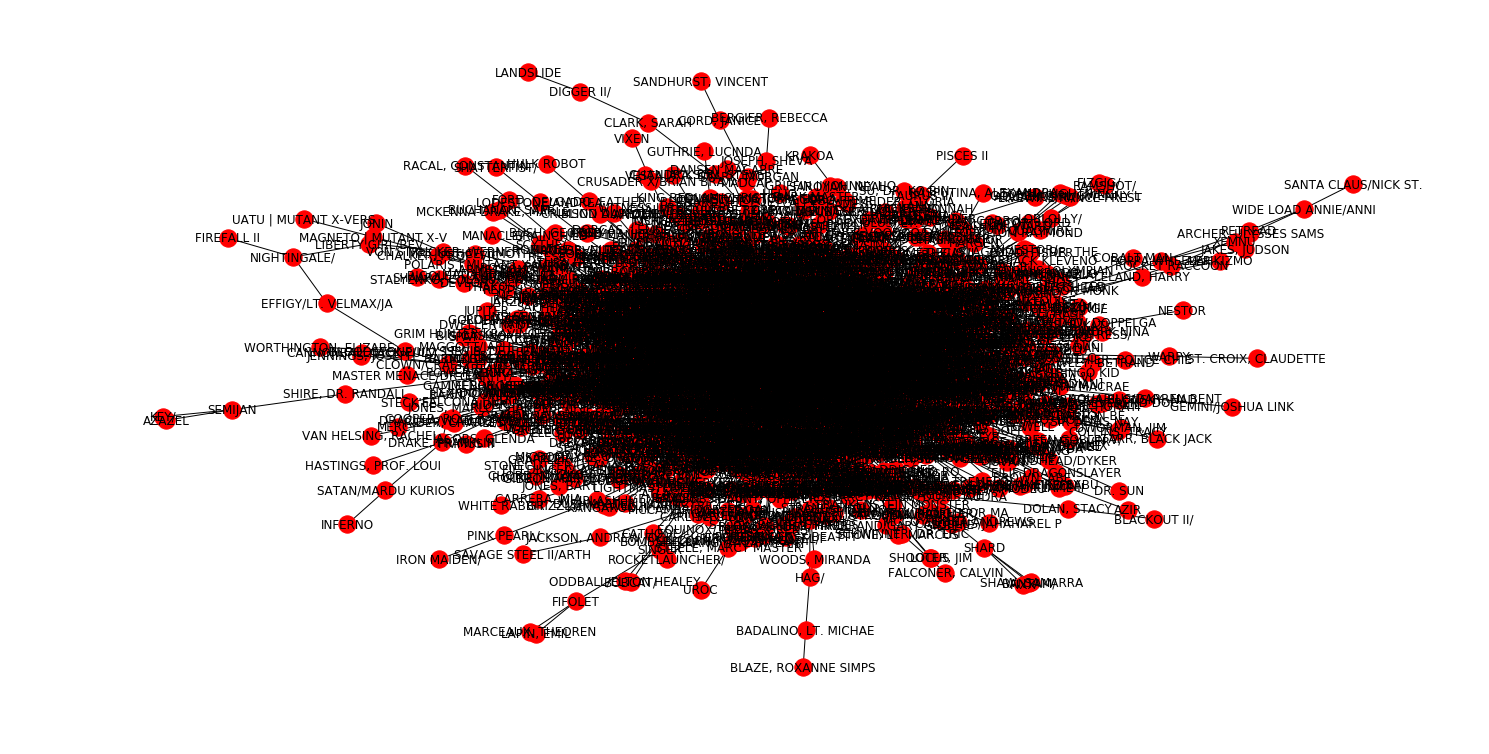

In [192]:
# Visualization for the largest connected graph cG
plt.show(nx.draw(cG, with_labels=True)) 

<h3> Check if the Graph is connected this time </h3>

In [193]:
# Is cG connected 
nx.is_connected(cG)

True

<h3> Get Vital Stats for our Connected Graph </h3>

In [194]:
# Vital stats for cG
print(nx.info(cG))

Name: 
Type: Graph
Number of nodes: 2147
Number of edges: 4840
Average degree:   4.5086


<h3>Distance Metric</h3>

In [195]:
# Distance Metric
print('center =', nx.center(cG))
print('diameter =', nx.diameter(cG))
print('radius =', nx.radius(cG))

center = ['CAPTAIN AMERICA', 'SPIDER-MAN/PETER PAR']
diameter = 12
radius = 6


<h3> Top 5 - Most Connected Superheros </h3>

In [196]:
# Top 5 - Most Connected Superheros in Ascending Order

nDf = pd.DataFrame(list(nx.degree(cG)), columns=['Name', 'Degree'])
nDf.sort_values('Degree', inplace=True)
nDf.tail()

,Name,Degree
986,THOR/DR. DONALD BLAK,76
1820,WOLVERINE/LOGAN,81
1811,STORM/ORORO MUNROE S,86
906,SPIDER-MAN/PETER PAR,93
476,CAPTAIN AMERICA,116


<p>The above result shows Spider Man and Captain America as the most connected Superheros. the aboev result confirms our findings of Centrality in distance Metric.</p>


<h3>Connected Node Distribution</h3>

<p>Let's take a look at a histogram of the number of connections per node:</p>


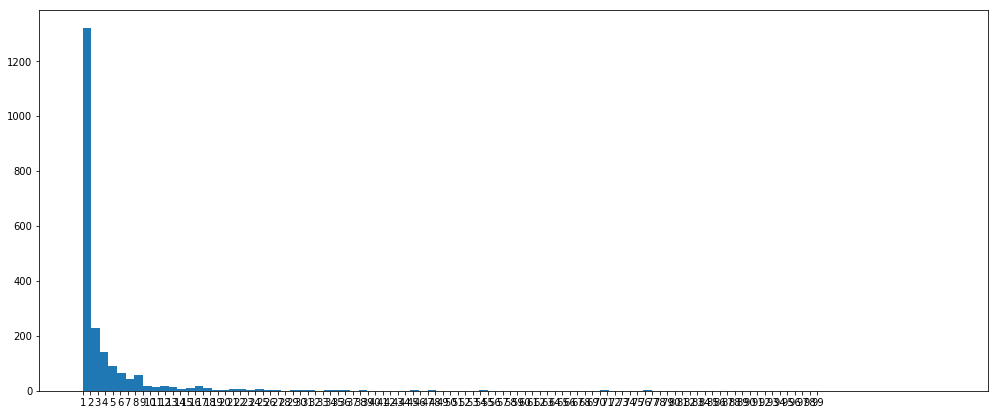

In [202]:
#Histogram for Connected Node Distribution
plt.rcParams['figure.figsize'] = (17.0, 7.0)
plt.figure(2)
plt.hist(nDf.Degree,bins=100)
plt.xticks(range(1,100))
plt.show()

<p> As seen above the vast majority of vertices have one degree </p>

In [210]:
nDf.Degree.describe()

count    2147.000000
mean        4.508617
std         8.979541
min         1.000000
25%         1.000000
50%         2.000000
75%         4.000000
max       116.000000
Name: Degree, dtype: float64

<h3> Other Centrality Measures </h3>

In [214]:
closeness = nx.closeness_centrality(cG)
closeness = sorted(closeness.items(), key=operator.itemgetter(1))
betweenness = nx.betweenness_centrality(cG)
betweenness = sorted(betweenness.items(), key=operator.itemgetter(1))
#print(type(closeness))
#print(type(betweenness))
print((closeness[-1][0],  round(closeness[-1][1],4)))

('CAPTAIN AMERICA', 0.3756)


<h3>Top 5 node with the highest closeness centrality.</h3>


In [216]:
closeness[-5:]

[('THING/BENJAMIN J. GR', 0.3581441922563418),
 ('MR. FANTASTIC/REED R', 0.3603694374475231),
 ('IRON MAN/TONY STARK ', 0.3609149007736293),
 ('SPIDER-MAN/PETER PAR', 0.36231639371939894),
 ('CAPTAIN AMERICA', 0.3756345177664975)]

<h3>Top 5 node with the highest betweenness centrality.</h3>

In [217]:
betweenness[-5:]

[('THOR/DR. DONALD BLAK', 0.059465252056513394),
 ('IRON MAN/TONY STARK ', 0.0606942756278737),
 ('WOLVERINE/LOGAN ', 0.07095880919090747),
 ('SPIDER-MAN/PETER PAR', 0.10113858740816206),
 ('CAPTAIN AMERICA', 0.110314591135398)]